# Bootstrap analysis 226 people 
Start with 250 and sample with replacement random sampling, each time go in - can do many times - find best fitting model for each sample of 1000 and compute the BIC, LR for each samples - make a distribution, going to be power analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import datetime
from scipy import stats

In [5]:
data = pd.read_csv('./../Grammar_wo_feedback2.21-22.18.csv', encoding = "utf-8") # data take from sequelpro on performance
data = data[4:] # first two rows aren't data and next two are from piloting

data['Duration (in seconds)'] = data['Duration (in seconds)'].astype(int)
# data = data[data['Duration (in seconds)'] > 600] 

data['score'] = data['SC0'].astype(int)
data['absAssess0'] = data['absAssess0'].astype(int)
data['absAssess1'] = data['absAssess1'].astype(int)
data['relAssess0'] = data['relAssess0_1'].astype(int)
data['relAssess1'] = data['relAssess1_1'].astype(int)
data['diffSelf0'] = data['diffSelf0_1'].astype(int)
data['diffSelf1'] = data['diffSelf1_1'].astype(int)
data['diffOther0'] = data['diffOther0_1'].astype(int)
data['diffOther1'] = data['diffOther1_1'].astype(int)
data['grammarAssess0'] = data['grammarAssess0_1'].astype(int)
data['grammarAssess1'] = data['grammarAssess1_1'].astype(int)


data

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,random,score,relAssess0,relAssess1,diffSelf0,diffSelf1,diffOther0,diffOther1,grammarAssess0,grammarAssess1
4,2018-02-21 09:56:18,2018-02-21 10:10:46,IP Address,68.193.24.4,100,867,True,2018-02-21 10:10:46,R_2Edh71ZVRA9BOSL,NaN,...,8843,7,74,51,3,6,3,6,73,63
5,2018-02-21 09:58:40,2018-02-21 10:17:47,IP Address,67.2.26.173,100,1147,True,2018-02-21 10:17:48,R_ZCdhvazqQBLIDwl,NaN,...,6677,15,55,55,5,5,6,5,55,55
6,2018-02-21 10:16:22,2018-02-21 10:32:27,IP Address,199.80.74.66,100,964,True,2018-02-21 10:32:27,R_Abp7tpIyWv6cBpv,NaN,...,4261,13,85,70,2,7,3,7,89,70
7,2018-02-21 11:03:09,2018-02-21 11:11:14,IP Address,73.11.54.96,100,485,True,2018-02-21 11:11:15,R_3oYnjxB8hcKVGRr,NaN,...,9729,6,29,9,7,9,8,9,32,19
8,2018-02-21 10:55:48,2018-02-21 11:16:23,IP Address,68.58.150.214,100,1235,True,2018-02-21 11:16:24,R_1Ii9mycAzK5zPQ6,NaN,...,8148,12,90,75,2,4,5,4,90,75
9,2018-02-21 12:42:43,2018-02-21 13:04:44,IP Address,45.36.195.72,100,1320,True,2018-02-21 13:04:45,R_1DZRZh7m1nwid4y,NaN,...,6200,14,50,50,5,5,6,5,50,50
10,2018-02-21 13:41:50,2018-02-21 13:46:27,IP Address,23.254.144.154,100,276,True,2018-02-21 13:46:27,R_2UeVV5WvkEpQLNJ,NaN,...,5343,4,99,74,2,10,2,10,85,68
11,2018-02-21 14:16:26,2018-02-21 14:35:33,IP Address,67.250.96.148,100,1146,True,2018-02-21 14:35:33,R_6QKlj5VoZeL8WKB,NaN,...,5803,9,45,51,8,8,6,8,50,60
12,2018-02-21 15:28:45,2018-02-21 15:45:13,IP Address,207.244.106.50,100,988,True,2018-02-21 15:45:14,R_8k0F4WJF2ZCOmsh,NaN,...,2799,11,80,90,4,5,8,5,70,80
13,2018-02-21 18:37:48,2018-02-21 18:46:17,IP Address,67.250.96.148,100,508,True,2018-02-21 18:46:17,R_51QwwcQj9HqbHW1,NaN,...,7306,7,55,60,8,7,5,7,55,61


In [4]:
#independent model
preds_ind = pd.read_csv('./../ModelSimulations/preds_basic_grammar.csv', encoding = "utf-8")

In [5]:
#best dependent model
preds_dep = pd.read_csv('./../ModelSimulations/preds_depend_grammar.csv', encoding = "utf-8")

In [6]:
from scipy.stats import chisqprob
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

In [7]:
BICs0 = [] # will fill with BICs for simpler model
BICs1 = [] # will fill with BICs for complex model
LRs = [] # will fill with likelihood ratio test results

count = 0
for i in range(1000):
    bootstrap_data = data.sample(1000, replace=True) # random sampling with replacement of data to get 1000
    
    ssesIND = [] # list of SSEs for each independent model prediction
    for i in range(120):
        pred = preds_ind[str(i)]
        sse = 0
        for s,guess in zip(bootstrap_data['score'],bootstrap_data['absAssess1']):
            error = abs(pred[s] - guess) 
            sse += error**2
        ssesIND.append(sse)
    
    ssesDEP = [] # list of SSEs for each dependent model prediction
    for i in range(274):
        pred = preds_dep[str(i)]
        sse = 0
        for s,guess in zip(bootstrap_data['score'],bootstrap_data['absAssess1']):
            error = abs(pred[s] - guess) 
            sse += error**2
        ssesDEP.append(sse)
        
    k0 = 3 # ind model has 3 params (mu, sigma, eps)
    k1 = 4 # dep model has 4 (mu, sigma, eps0, alpha)
    n = 1000 # total participants
    s0 = min(ssesIND) # sse for ind model
    s1 = min(ssesDEP) # sse for dep model

    L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
    BIC0 = k0 * np.log(n) - 2*L0
    L1 = -n/2 *(1 + np.log(2*np.pi*(s1/n)))
    BIC1 = k1 * np.log(n) - 2*L1
    
    LR = likelihood_ratio(L0,L1)
    
    BICs0.append(BIC0)
    BICs1.append(BIC1)
    LRs.append(LR)
    
    count+=1
    print(count)
    print('BIC0: ', BIC0)
    print('BIC1: ', BIC1)
    print('LR: ', LR)


1
BIC0:  5558.799016203841
BIC1:  5557.239409586142
LR:  8.467361896681723
2
BIC0:  5559.73739491058
BIC1:  5567.346802119031
LR:  -0.7016519294684258
3
BIC0:  5487.151695597475
BIC1:  5500.729164656515
LR:  -6.669713780058373
4
BIC0:  5584.410448877832
BIC1:  5595.024004331507
LR:  -3.7058001746927403
5
BIC0:  5548.194882588577
BIC1:  5556.443454018162
LR:  -1.340816150603132
6
BIC0:  5484.468454526239
BIC1:  5493.060097941844
LR:  -1.6838881366229543
7
BIC0:  5528.794038687617
BIC1:  5542.403628089255
LR:  -6.701834122655782
8
BIC0:  5573.435649163383
BIC1:  5590.686159156038
LR:  -10.342754713673457
9
BIC0:  5534.537160587632
BIC1:  5545.620507335998
LR:  -4.175591469384017
10
BIC0:  5602.358273434506
BIC1:  5617.249908900778
LR:  -7.983880187289287
11
BIC0:  5494.509446452843
BIC1:  5509.559769530471
LR:  -8.142567798646269
12
BIC0:  5499.468341700584
BIC1:  5499.973705689606
LR:  6.402391289960178
13
BIC0:  5537.417890150196
BIC1:  5551.651533579476
LR:  -7.3258881502970326
14
BIC

In [8]:
# means of all three lists
print('mean BIC0: ', np.mean(BICs0))
print('mean BIC1: ', np.mean(BICs1))
print('mean LRs: ', np.mean(LRs))

mean BIC0:  5541.015483032916
mean BIC1:  5551.746097752476
mean LRs:  -3.8228594405779024


In [9]:
above_thresh = 0
for lr in LRs:
    if lr > 3.84:
        above_thresh+=1
above_thresh

44

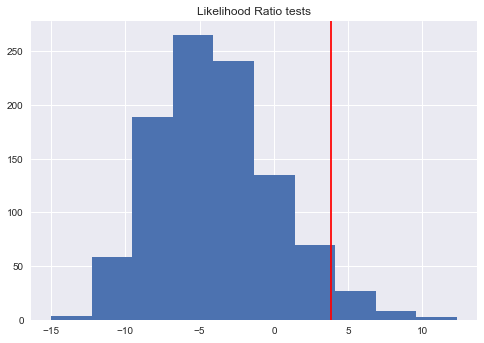

In [10]:
fig, ax = plt.subplots()
plt.hist(LRs)
plt.title('Likelihood Ratio tests')
plt.axvline(x=3.84, color='r') # vertical line where threshold for chi-square test
# fig.savefig('figs/Bootstrap_LRs.png')
# fig.savefig('figs/Bootstrap_LRs.eps', dpi=1000)

Text(0.5,1,'BICs: Independent Model')

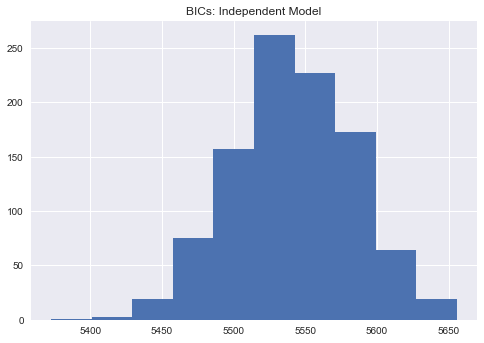

In [11]:
plt.hist(BICs0)
plt.title('BICs: Independent Model')

Text(0.5,1,'BICs: Dependent Model')

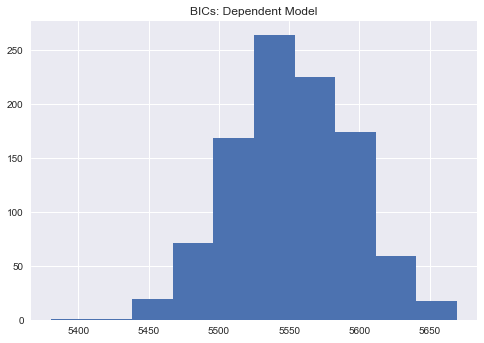

In [12]:
plt.hist(BICs1)
plt.title('BICs: Dependent Model')

In [13]:
# convert them to a new dataframe with LR and BICs
d = {'LR': LRs, 'BIC0': BICs0, 'BIC1': BICs1}
new_data = pd.DataFrame(data=d)

# save to CSV for future reference
new_data.to_csv('bootstrap_grammar.csv', columns = new_data.columns, index=False)
new_data

,BIC0,BIC1,LR
0,5558.799016,5557.239410,8.467362
1,5559.737395,5567.346802,-0.701652
2,5487.151696,5500.729165,-6.669714
3,5584.410449,5595.024004,-3.705800
4,5548.194883,5556.443454,-1.340816
5,5484.468455,5493.060098,-1.683888
6,5528.794039,5542.403628,-6.701834
7,5573.435649,5590.686159,-10.342755
8,5534.537161,5545.620507,-4.175591
9,5602.358273,5617.249909,-7.983880


In [23]:
new_data['L0'] = [(k0 * np.log(n) - BIC)/2 for BIC in new_data.BIC0]
new_data['L1'] = [(k1 * np.log(n) - BIC)/2 for BIC in new_data.BIC1]
new_data['LR2'] = 2 * (new_data['L1'] - new_data['L0'])

In [24]:
new_data

,BIC0,BIC1,LR,L0,L1,LR2
0,5558.799016,5557.239410,8.467362,-2769.037875,-2764.804194,8.467362
1,5559.737395,5567.346802,-0.701652,-2769.507065,-2769.857891,-0.701652
2,5487.151696,5500.729165,-6.669714,-2733.214215,-2736.549072,-6.669714
3,5584.410449,5595.024004,-3.705800,-2781.843592,-2783.696492,-3.705800
4,5548.194883,5556.443454,-1.340816,-2763.735808,-2764.406216,-1.340816
5,5484.468455,5493.060098,-1.683888,-2731.872594,-2732.714538,-1.683888
6,5528.794039,5542.403628,-6.701834,-2754.035386,-2757.386303,-6.701834
7,5573.435649,5590.686159,-10.342755,-2776.356192,-2781.527569,-10.342755
8,5534.537161,5545.620507,-4.175591,-2756.906947,-2758.994743,-4.175591
9,5602.358273,5617.249909,-7.983880,-2790.817504,-2794.809444,-7.983880


In [25]:
s0

14082.782461705126

In [26]:
s1

14147.444182396877

In [31]:
np.linspace(0,.5,6)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [32]:
np.linspace(0,0.5,num=11)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

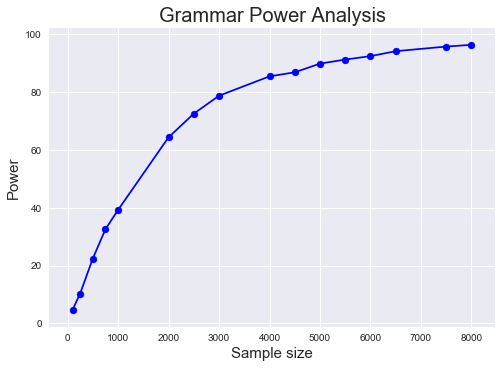

In [12]:
#grammar
fig, ax = plt.subplots()

samples = [100,250,500,750,1000,2000,2500,3000,4000,4500,5000,5500,6000,6500,7500,8000]
power = [4.7,10.3,22.4,32.5,39.2,64.3,72.5,78.7,85.4,86.8,89.8,91.2,92.4,94.1,95.7,96.3]
plt.plot(samples,power,color='b')
plt.scatter(samples,power,color='b')
ax.set_title('Grammar Power Analysis',fontsize = 20)

ax.set_xlabel('Sample size',fontsize = 15)
ax.set_ylabel('Power',fontsize = 15)

# ax.set_facecolor('white')
# plt.axhline(30, color='black')
# plt.axvline(500, color='black')
# plt.axhline(100, color='black')
# plt.axvline(8500, color='black')

# fig.savefig('power_grammar.eps', dpi=1000)

In [7]:
boots1000 = pd.read_csv('./bootstrap_1000_super_alpha0.csv', encoding = "utf-8")
len(boots1000[boots1000.LR >3.84])

392

In [8]:
boots2000 = pd.read_csv('./bootstrap_2000_super_alpha0.csv', encoding = "utf-8")
len(boots2000[boots2000.LR >3.84])

643

In [9]:
boots2500 = pd.read_csv('./bootstrap_2500_super_alpha0.csv', encoding = "utf-8")
len(boots2500[boots2500.LR >3.84])

725

In [10]:
boots3000 = pd.read_csv('./bootstrap_3000_super_alpha0.csv', encoding = "utf-8")
len(boots3000[boots3000.LR >3.84])

787

In [11]:
boots4000 = pd.read_csv('./bootstrap_4000_super_alpha0.csv', encoding = "utf-8")
len(boots4000[boots4000.LR >3.84])

854

In [12]:
boots4500 = pd.read_csv('./bootstrap_4500_super_alpha0.csv', encoding = "utf-8")
len(boots4500[boots4500.LR >3.84])

868

In [13]:
boots5000 = pd.read_csv('./bootstrap_5000_super_alpha0.csv', encoding = "utf-8")
len(boots5000[boots5000.LR >3.84])

898

In [14]:
boots5500 = pd.read_csv('./bootstrap_5500_super_alpha0.csv', encoding = "utf-8")
len(boots5500[boots5500.LR >3.84])

912

In [15]:
boots6000 = pd.read_csv('./bootstrap_6000_super_alpha0.csv', encoding = "utf-8")
len(boots6000[boots6000.LR >3.84])

924

In [16]:
boots6500 = pd.read_csv('./bootstrap_6500_super_alpha0.csv', encoding = "utf-8")
len(boots6500[boots6500.LR >3.84])

941

In [17]:
boots7500 = pd.read_csv('./bootstrap_7500_super_alpha0.csv', encoding = "utf-8")
len(boots7500[boots7500.LR >3.84])

957

In [18]:
boots8000 = pd.read_csv('./bootstrap_8000_super_alpha0.csv', encoding = "utf-8")
len(boots8000[boots8000.LR >3.84])

963

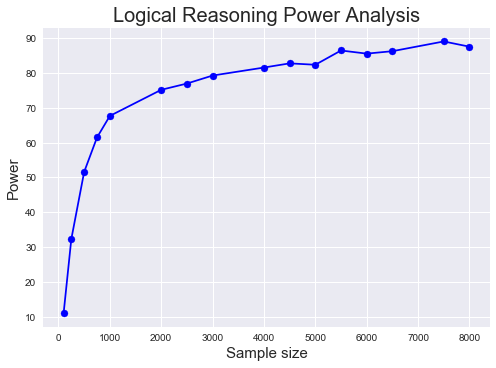

In [14]:
#lsat
fig, ax = plt.subplots()

samples = [100,250,500,750,1000,2000,2500,3000,4000,4500,5000,5500,6000,6500,7500,8000]
power = [11,32.3,51.6,61.5,67.7,75.2,77.0,79.3,81.6,82.8,82.4,86.5,85.6,86.3,89.1,87.6]

plt.scatter(samples,power,color='b')
plt.plot(samples,power,color='b')
ax.set_title('Logical Reasoning Power Analysis',fontsize = 20)


ax.set_xlabel('Sample size',fontsize = 15)
ax.set_ylabel('Power',fontsize = 15)
# ax.set_ylim(40,95)

# ax.set_facecolor('white')
# plt.axhline(30, color='black')
# plt.axvline(500, color='black')
# plt.axhline(100, color='black')
# plt.axvline(8500, color='black')

# fig.savefig('power_lsat.eps', dpi=1000)

In [29]:
boots1000 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_1000_super_alpha0.csv', encoding = "utf-8")
len(boots1000[boots1000.LR >3.84])

677

In [30]:
boots2000 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_2000_super_alpha0.csv', encoding = "utf-8")
len(boots2000[boots2000.LR >3.84])

752

In [31]:
boots2500 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_2500_super_alpha0.csv', encoding = "utf-8")
len(boots2500[boots2500.LR >3.84])

770

In [32]:
boots3000 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_3000_super_alpha0.csv', encoding = "utf-8")
len(boots3000[boots3000.LR >3.84])

793

In [33]:
boots4000 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_4000_super_alpha0.csv', encoding = "utf-8")
len(boots4000[boots4000.LR >3.84])

816

In [34]:
boots4500 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_4500_super_alpha0.csv', encoding = "utf-8")
len(boots4500[boots4500.LR >3.84])

828

In [35]:
boots5000 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_5000_super_alpha0.csv', encoding = "utf-8")
len(boots5000[boots5000.LR >3.84])

824

In [36]:
boots5500 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_5500_super_alpha0.csv', encoding = "utf-8")
len(boots5500[boots5500.LR >3.84])

865

In [37]:
boots6000 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_6000_super_alpha0.csv', encoding = "utf-8")
len(boots6000[boots6000.LR >3.84])

856

In [38]:
boots6500 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_6500_super_alpha0.csv', encoding = "utf-8")
len(boots6500[boots6500.LR >3.84])

863

In [39]:
boots7500 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_7500_super_alpha0.csv', encoding = "utf-8")
len(boots7500[boots7500.LR >3.84])

891

In [40]:
boots8000 = pd.read_csv('./../../LSAT/DKrep/Bootstraps/bootstrap_8000_super_alpha0.csv', encoding = "utf-8")
len(boots8000[boots8000.LR >3.84])

876